# Weekend Movie Trip

Submitted by Amin Shojaeighadikolaei


This project is about clustring. The method of identifying similar groups of data in a dataset is called clustering.Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters. Here there is a data about movies.This dataset describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. There are several algorithms for clustring as following:

- Connectivity models
- Centroid models
- Distribution models
- Density Models

In this project I want to use 2 famous algorithms for the provided dataset. Centroild models and Density models.
For the Centroid models I wanna use K-means approach and for the Density model use DBSCAN.

The project is divided into 3 main step:
#### Part 1:
    - Loading and clearing datasets
#### Part 2:
    - Feature engineering 
#### Part 3:
    - Clustring models

# Part 1  

## Import datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv('https://raw.githubusercontent.com/aminshojaei/Weekend-movie-trip/master/dataset/movies.csv', low_memory = False)

links = pd.read_csv('https://raw.githubusercontent.com/aminshojaei/Weekend-movie-trip/master/dataset/links.csv', low_memory = False)

ratings = pd.read_csv('https://raw.githubusercontent.com/aminshojaei/Weekend-movie-trip/master/dataset/ratings.csv', low_memory = False)

tags = pd.read_csv('https://raw.githubusercontent.com/aminshojaei/Weekend-movie-trip/master/dataset/tags.csv', low_memory = False)

## Cleaning and Merigng

In [3]:
ratings_tags = pd.merge(ratings , tags , left_on = ['userId', 'movieId'],right_on=['userId' , 'movieId'], how='left')
ratings_tags.head()

userId  movieId  rating  timestamp_x  tag  timestamp_y
0       1        1     4.0    964982703  NaN          NaN
1       1        3     4.0    964981247  NaN          NaN
2       1        6     4.0    964982224  NaN          NaN
3       1       47     5.0    964983815  NaN          NaN
4       1       50     5.0    964982931  NaN          NaN

- As you see, there are 2 columns for time stamp which are irrelevant for our approach. In hence, I will drop them from the dataset.

In [4]:
ratings_tags.drop(['timestamp_x','timestamp_y'],axis=1,inplace=True)
ratings_tags.head()

userId  movieId  rating  tag
0       1        1     4.0  NaN
1       1        3     4.0  NaN
2       1        6     4.0  NaN
3       1       47     5.0  NaN
4       1       50     5.0  NaN

- Now I wanna merge the new dataset with movies dataset to add a column for genres which is needed for our approach.

In [5]:
ratings_tags_movies = pd.merge(ratings_tags , movies , how ='left' ,on=['movieId'])
ratings_tags_movies.head()

userId  movieId  rating  tag                        title  \
0       1        1     4.0  NaN             Toy Story (1995)   
1       1        3     4.0  NaN      Grumpier Old Men (1995)   
2       1        6     4.0  NaN                  Heat (1995)   
3       1       47     5.0  NaN  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  NaN   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller

In [6]:
ratings_tags_movies['tag'].nunique()

1543

In [7]:
del ratings_tags_movies['tag']
newdataset=ratings_tags_movies.dropna(how='any')  
newdataset.head()

userId  movieId  rating                        title  \
0       1        1     4.0             Toy Story (1995)   
1       1        3     4.0      Grumpier Old Men (1995)   
2       1        6     4.0                  Heat (1995)   
3       1       47     5.0  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller

In [8]:
newdataset.describe()

userId        movieId         rating
count  102677.000000  102677.000000  102677.000000
mean      327.761933   19742.712623       3.514813
std       183.211289   35884.400990       1.043133
min         1.000000       1.000000       0.500000
25%       177.000000    1199.000000       3.000000
50%       328.000000    3005.000000       3.500000
75%       477.000000    8366.000000       4.000000
max       610.000000  193609.000000       5.000000

- I wanna know that how many unique tag have our dataset.For this, following code is provided.

In [9]:
genres = set()
for i in newdataset['genres'].str.split('|').values:
    genres = genres.union(set(i))
print('different labels in genres are: ',genres)

different labels in genres are:  {'Mystery', 'Drama', 'Children', 'Sci-Fi', '(no genres listed)', 'Thriller', 'Action', 'IMAX', 'Documentary', 'Animation', 'Horror', 'Romance', 'Crime', 'Adventure', 'Comedy', 'Musical', 'Western', 'Film-Noir', 'Fantasy', 'War'}


- Now I wanna show that which genre is more frequent in our dataset.

In [10]:
genre_freq = {}
for i in genres:
    genre_freq[i]=0
for array in newdataset['genres'].str.split('|'):
    for x in array:
        genre_freq[x] += 1
print(genre_freq)

{'Mystery': 7906, 'Drama': 43024, 'Children': 9285, 'Sci-Fi': 17691, '(no genres listed)': 49, 'Thriller': 27175, 'Action': 31151, 'IMAX': 4258, 'Documentary': 1259, 'Animation': 7119, 'Horror': 7408, 'Romance': 18353, 'Crime': 17224, 'Adventure': 24497, 'Comedy': 39622, 'Musical': 4170, 'Western': 1966, 'Film-Noir': 880, 'Fantasy': 11989, 'War': 4931}


- Now I wanna plot the frequency of genres in our dataset.

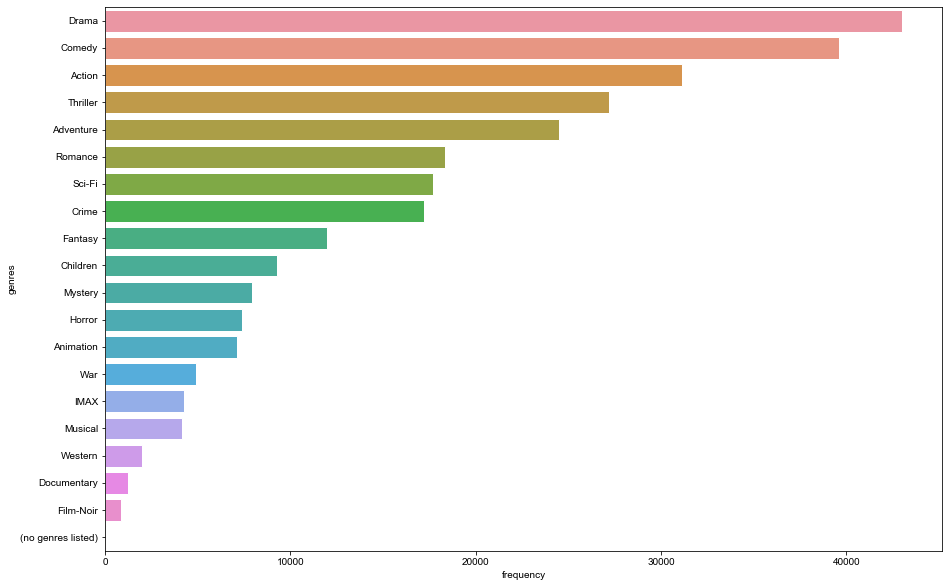

In [11]:
f, ax = plt.subplots(figsize=(15, 10))
genre_frequency = pd.DataFrame(list(genre_freq.items()) , columns=['genres','frequency']).sort_values(by='frequency' , ascending=False)
genre_frequency.head()
sns.set(style="whitegrid")
sns.barplot(x='frequency' ,y='genres' , data= genre_frequency  )

In [12]:
newdataset.head()

userId  movieId  rating                        title  \
0       1        1     4.0             Toy Story (1995)   
1       1        3     4.0      Grumpier Old Men (1995)   
2       1        6     4.0                  Heat (1995)   
3       1       47     5.0  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller

In [13]:
# This shows the mean rating for an specific movie
mean_rating = newdataset.groupby('movieId', as_index= False)['rating'].mean().rename(columns={'rating':'average_rating'})
final_dataset = pd.merge (mean_rating , newdataset , on='movieId')
final_dataset = final_dataset.drop_duplicates('movieId')
final_dataset.head()


movieId  average_rating  userId  rating  \
0          1        3.920930       1     4.0   
215        2        3.441964       6     4.0   
327        3        3.245283       1     4.0   
380        4        2.357143       6     3.0   
387        5        3.040000       6     5.0   

                                  title  \
0                      Toy Story (1995)   
215                      Jumanji (1995)   
327             Grumpier Old Men (1995)   
380            Waiting to Exhale (1995)   
387  Father of the Bride Part II (1995)   

                                          genres  
0    Adventure|Animation|Children|Comedy|Fantasy  
215                   Adventure|Children|Fantasy  
327                               Comedy|Romance  
380                         Comedy|Drama|Romance  
387                                       Comedy

- Now I will remove those columns which are irrelevent to my model.

In [14]:
final_dataset = final_dataset.iloc[:, [0,1,4,5]].set_index('movieId')
final_dataset.head()

average_rating                               title  \
movieId                                                       
1              3.920930                    Toy Story (1995)   
2              3.441964                      Jumanji (1995)   
3              3.245283             Grumpier Old Men (1995)   
4              2.357143            Waiting to Exhale (1995)   
5              3.040000  Father of the Bride Part II (1995)   

                                              genres  
movieId                                               
1        Adventure|Animation|Children|Comedy|Fantasy  
2                         Adventure|Children|Fantasy  
3                                     Comedy|Romance  
4                               Comedy|Drama|Romance  
5                                             Comedy

In [15]:
from sklearn.preprocessing import LabelEncoder
Encoder_label = LabelEncoder()

final_dataset['genres'] = Encoder_label.fit_transform(final_dataset['genres'].astype('str'))
final_dataset.head()

average_rating                               title  genres
movieId                                                            
1              3.920930                    Toy Story (1995)     351
2              3.441964                      Jumanji (1995)     417
3              3.245283             Grumpier Old Men (1995)     732
4              2.357143            Waiting to Exhale (1995)     687
5              3.040000  Father of the Bride Part II (1995)     634

In [16]:
tags['tag'].value_counts()

In Netflix queue     131
atmospheric           36
superhero             24
thought-provoking     24
funny                 23
                    ... 
saints                 1
relaxing               1
Cole Porter            1
Mindfuck               1
subway                 1
Name: tag, Length: 1589, dtype: int64

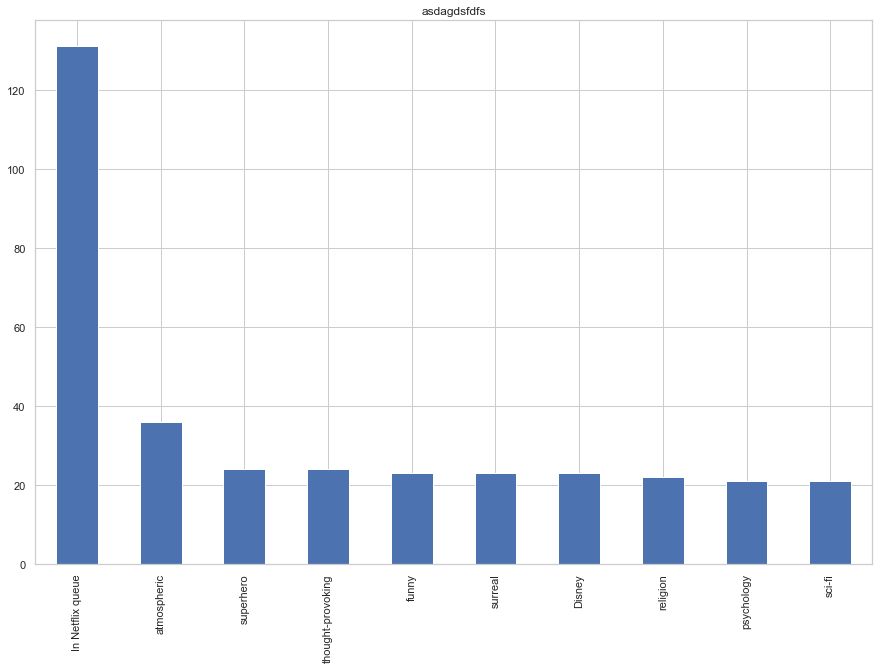

In [17]:
tags['tag'].value_counts().head(10).plot(kind='bar', figsize=(15,10),title='asdagdsfdfs')

In [18]:
tags.groupby('movieId', as_index= False)['tag'].nunique().sort_values(ascending=False).head()


77     173
639     48
206     40
433     32
76      32
Name: tag, dtype: int64

# K-means


For this part I wanna use k-mean approach for final_dataset. 

In [19]:
final_dataset.dropna(how='any')
final_dataset


average_rating                                      title  genres
movieId                                                                   
1              3.920930                           Toy Story (1995)     351
2              3.441964                             Jumanji (1995)     417
3              3.245283                    Grumpier Old Men (1995)     732
4              2.357143                   Waiting to Exhale (1995)     687
5              3.040000         Father of the Bride Part II (1995)     634
...                 ...                                        ...     ...
193581         4.000000  Black Butler: Book of the Atlantic (2017)     150
193583         3.500000               No Game No Life: Zero (2017)     554
193585         3.500000                               Flint (2017)     812
193587         3.500000        Bungo Stray Dogs: Dead Apple (2018)     139
193609         4.000000        Andrew Dice Clay: Dice Rules (1991)     634

[9724 rows x 3 columns]

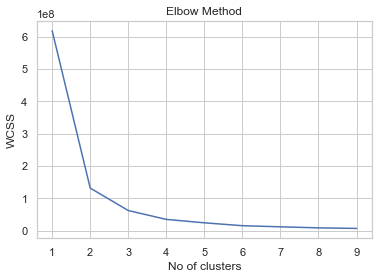

In [20]:
X=final_dataset
X = X.iloc[:,[0,2]].values
from sklearn.cluster import KMeans
wcss =[]
for i in range (1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

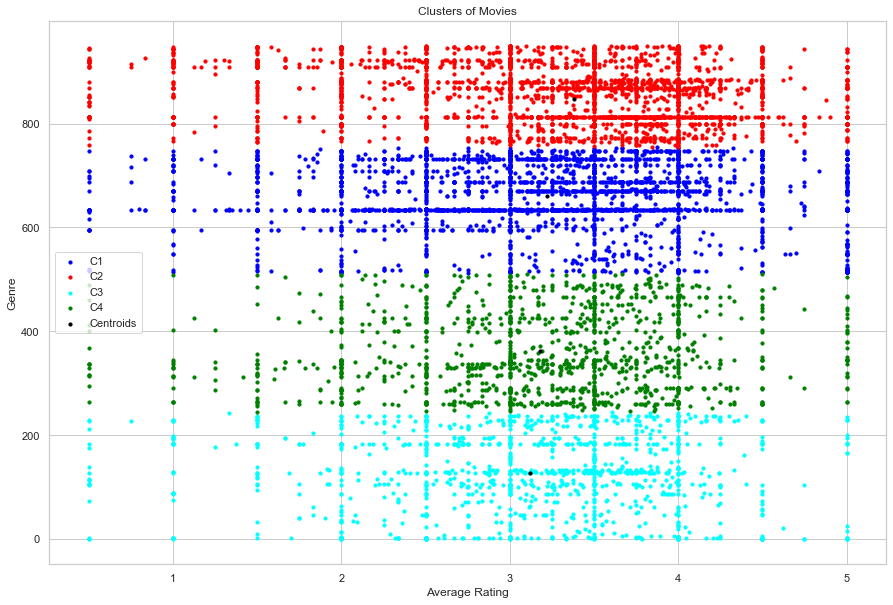

In [21]:
kmeans=KMeans(n_clusters= 4, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
Y_Kmeans = kmeans.fit_predict(X)


plt.figure(figsize=(15,10))
plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0,1],s = 10, c='blue', label = 'C1')

plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1,1],s = 10, c='red', label = 'C2')

plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2,1],s = 10, c='cyan', label = 'C3')

plt.scatter(X[Y_Kmeans == 3, 0], X[Y_Kmeans == 3,1],s = 10, c='green', label = 'C4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 10, c = 'black', label = 'Centroids')
   
plt.title('Clusters of Movies')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.legend()
plt.show()

# DBSCAN

In [22]:
final_dataset

average_rating                                      title  genres
movieId                                                                   
1              3.920930                           Toy Story (1995)     351
2              3.441964                             Jumanji (1995)     417
3              3.245283                    Grumpier Old Men (1995)     732
4              2.357143                   Waiting to Exhale (1995)     687
5              3.040000         Father of the Bride Part II (1995)     634
...                 ...                                        ...     ...
193581         4.000000  Black Butler: Book of the Atlantic (2017)     150
193583         3.500000               No Game No Life: Zero (2017)     554
193585         3.500000                               Flint (2017)     812
193587         3.500000        Bungo Stray Dogs: Dead Apple (2018)     139
193609         4.000000        Andrew Dice Clay: Dice Rules (1991)     634

[9724 rows x 3 columns]

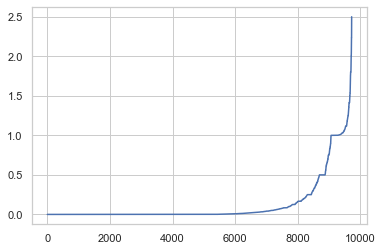

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

D_S=final_dataset
D_S= D_S.iloc[:,[0,2]].values

nbrs = NearestNeighbors(n_neighbors =2 , algorithm='ball_tree').fit(D_S)
distances , indices = nbrs.kneighbors (D_S)
distances = np.sort(distances , axis = 0)
distances = distances[:,1]
plt.plot(distances)
plt.show()


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:15<00:00,  1.77s/it]


3

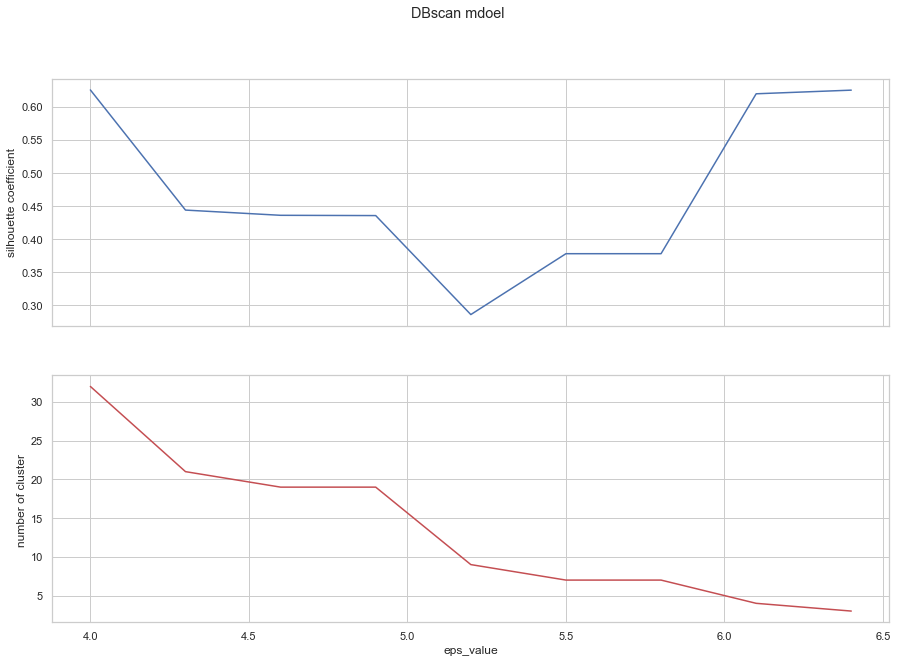

In [24]:
from tqdm import tqdm
from sklearn import metrics

eps_range = [x / 100.0 for x in range(400,650,30)]
eps_scores_1 = []
n_clusters_1 = []
for e in tqdm (eps_range):
 dbscan = DBSCAN(eps=e, min_samples=20)
 labels = dbscan.fit_predict(D_S)
 eps_scores_1.append(metrics.silhouette_score(D_S,labels))
 n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
 n_clusters_1.append(n_clusters)


#label = model.labels_

fig , axs = plt.subplots(2, sharex = True , figsize = (15,10))
fig.suptitle ('DBscan mdoel')

axs[0].plot (eps_range,eps_scores_1 , color ='b')
axs.flat[0].set(ylabel = 'silhouette coefficient')
axs[1].plot (eps_range,n_clusters_1, color='r')
axs.flat[1].set(ylabel = 'number of cluster ')
plt.xlabel('eps_value')
n_clusters


In [25]:
dbscan = DBSCAN (eps=6.1,min_samples=20)
model = dbscan.fit(D_S)
label = model.labels_
n_cluster = len(set(label)) - (1 if -1 in label else 0)
n_noise_ = list(label).count(-1)
print('number of cluster is: ',n_cluster)

print( metrics.silhouette_score(X,label))

number of cluster is:  4
0.6196970025705492


Text(0.5, 1.0, 'DBSCAN')

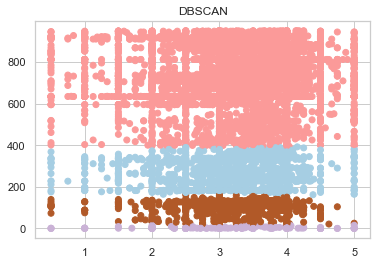

In [26]:
y_pred = dbscan.fit_predict(D_S)
plt.scatter(D_S[:,0], D_S[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")

Text(0.5, 1.0, 'K-means')

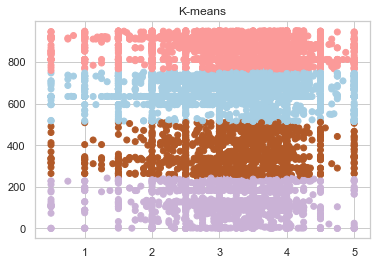

In [27]:

y_pred = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("K-means")